In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import os

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context('paper', font_scale=1, rc={'lines.linewidth': 0.7})


def mae(a, b):
    return np.round(np.nanmean(np.abs(a - b)), 3)

In [2]:
climdex_indices = [i.split('_')[1] for i in os.listdir("./climdex_results/indices/model/")]
climdex_indices = np.unique(climdex_indices).tolist()
index_types = ['MON', 'ANN']


model_path = './climdex_results/indices/model/'
bcmodel_path = './climdex_results/indices/model_biascorrected/'
obs_path = './climdex_results/indices/observed/'

In [3]:
df_indices = []
mae_before = []
mae_after = []

for index in climdex_indices:
    for index_type in index_types:
        try:
            obs = pd.read_csv(f"{obs_path}/observed_{index}_{index_type}.csv", skiprows=6)
            model = pd.read_csv(f"{model_path}/model_{index}_{index_type}.csv", skiprows=6)
            bcmodel = pd.read_csv(f"{bcmodel_path}/model_biascorrected_{index}_{index_type}.csv", skiprows=6)

            obs = obs.rename(columns={f' {index}': index})
            model = model.rename(columns={f' {index}': index})
            bcmodel = bcmodel.rename(columns={f' {index}': index})

            obs = obs[['time', index]]
            model = model[['time', index]]
            bcmodel = bcmodel[['time', index]]
            obs = obs.replace(-99.9, np.nan)
            
            df_indices.append(f"{index}_{index_type}")
            mae_after.append(mae(bcmodel[index], obs[index]))
            mae_before.append(mae(model[index], obs[index]))
        except:
            pass

In [4]:
df = pd.DataFrame({'index': df_indices, 'mae_before': mae_before, 'mae_after': mae_after})

[-5, 80, -5, 150]

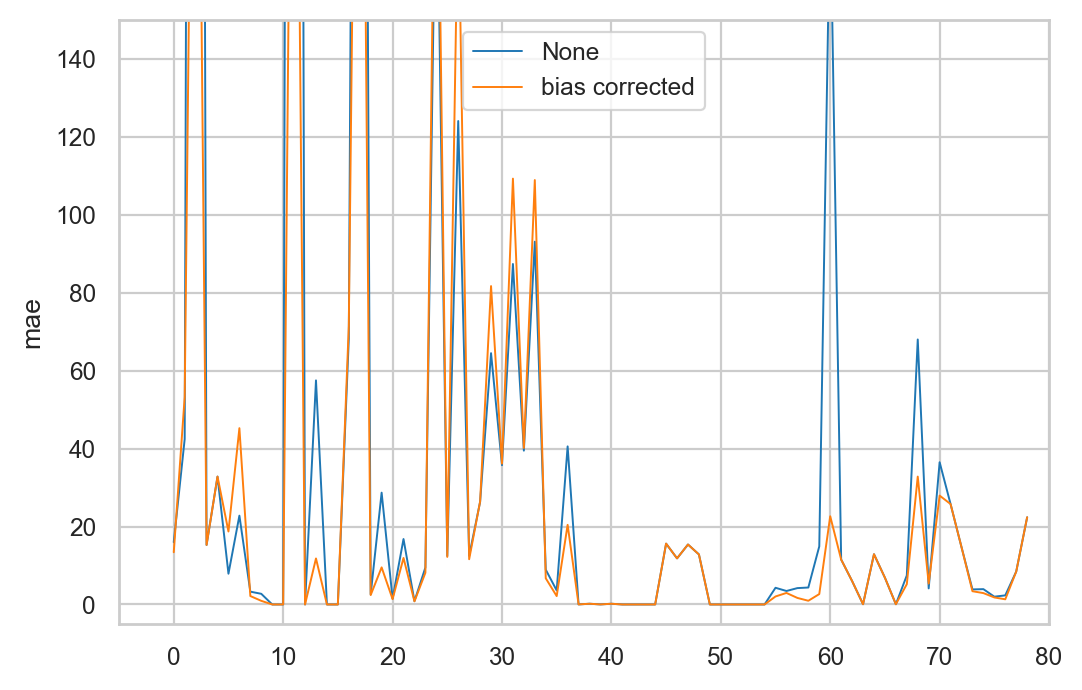

In [11]:
fig = plt.figure(dpi=200)
sns.lineplot(df.index, df['mae_before'], label='None')
sns.lineplot(df.index, df['mae_after'], label='bias corrected')

plt.ylabel('mae')
plt.axis([-5, 80, -5, 150])

In [6]:
b = df[df['mae_before'] < df['mae_after']]

([<matplotlib.axis.XTick at 0x1ba0c07c6a0>,
 <a list of 13 Text xticklabel objects>)

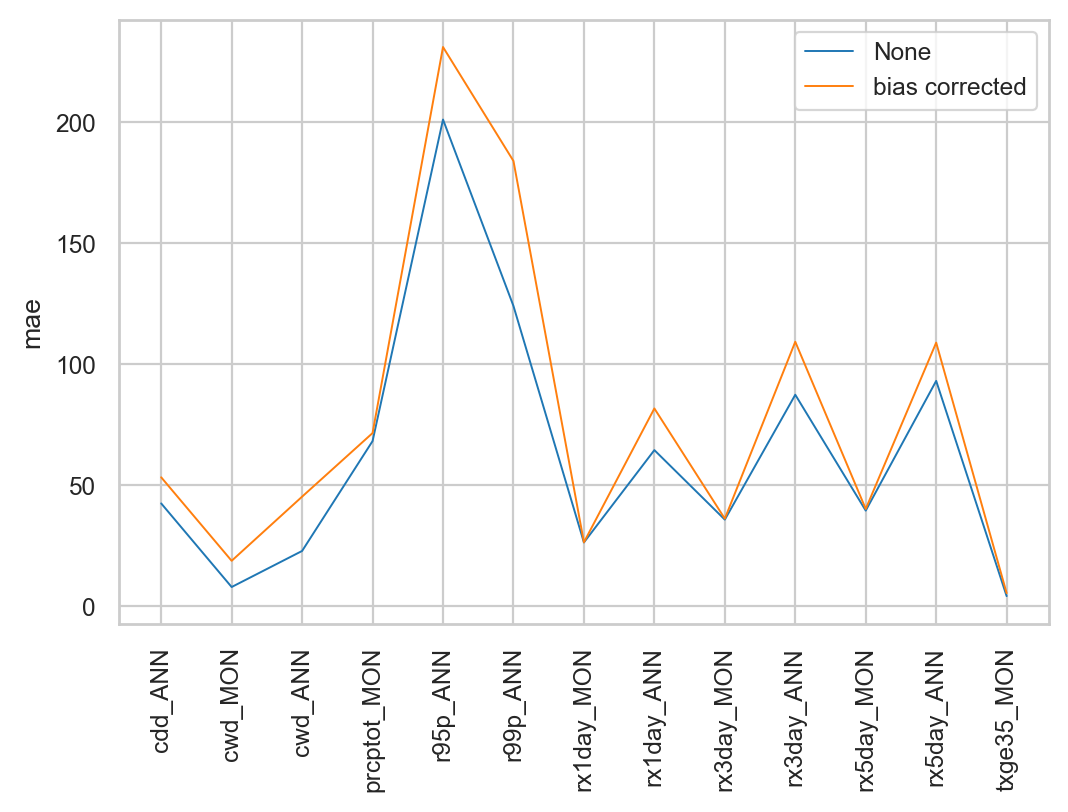

In [7]:
fig = plt.figure(dpi=200)

sns.lineplot(np.arange(len(b.index)), b['mae_before'], label='None')
sns.lineplot(np.arange(len(b.index)), b['mae_after'], label='bias corrected')

plt.ylabel('mae')
plt.xticks(ticks=np.arange(len(b.index)), labels=np.array(b['index']), rotation='vertical')

In [8]:
b.index

Int64Index([1, 5, 6, 16, 24, 26, 28, 29, 30, 31, 32, 33, 69], dtype='int64')

In [9]:
b

index  mae_before  mae_after
1       cdd_ANN      42.448     53.241
5       cwd_MON       7.886     18.723
6       cwd_ANN      22.793     45.241
16  prcptot_MON      68.202     71.527
24     r95p_ANN     201.134    231.112
26     r99p_ANN     124.060    184.000
28   rx1day_MON      26.313     26.380
29   rx1day_ANN      64.485     81.702
30   rx3day_MON      35.746     36.141
31   rx3day_ANN      87.373    109.275
32   rx5day_MON      39.472     40.162
33   rx5day_ANN      93.101    108.911
69   txge35_MON       4.127      5.355

In [10]:
len(b)

13